Features in  Domain Column are: 

0 : chain ,
1 : eap1 ,
2 : edw ,
3 : emdm ,
4 : finance ,
5 : invalid ,
6 : nan ,
7 : ope ,
8 : overall ,
9 : platform ,
10 : salesops ,
11 : scm ,
12 : services ,
13 : sops ,
14 : supply ,
Domain      
Finance         75
EDW             68
SalesOps        20
Services        17
EAP1.0          12
Supply Chain     8
Platform         4
SCM              3
Overall          3
EMDM             3
Salesops         2
SOPS             2
Invalid          2
OPE              1
dtype: int64
  (0, 14)	0.07094663549794433
  (0, 13)	0.017736658874486083
  (0, 12)	0.15076160043313172
  (0, 11)	0.026604988311729125
  (0, 10)	0.19510324761934691
  (0, 9)	0.035473317748972166
  (0, 8)	0.026604988311729125
  (0, 7)	0.008868329437243042
  (0, 6)	0.3281281891779925
  (0, 5)	0.017736658874486083
  (0, 4)	0.6651247077932281
  (0, 3)	0.026604988311729125
  (0, 2)	0.6030464017325269
  (0, 1)	0.1064199532469165
  (0, 0)	0.07094663549794433




Features in  Model Column are: 

0 : 

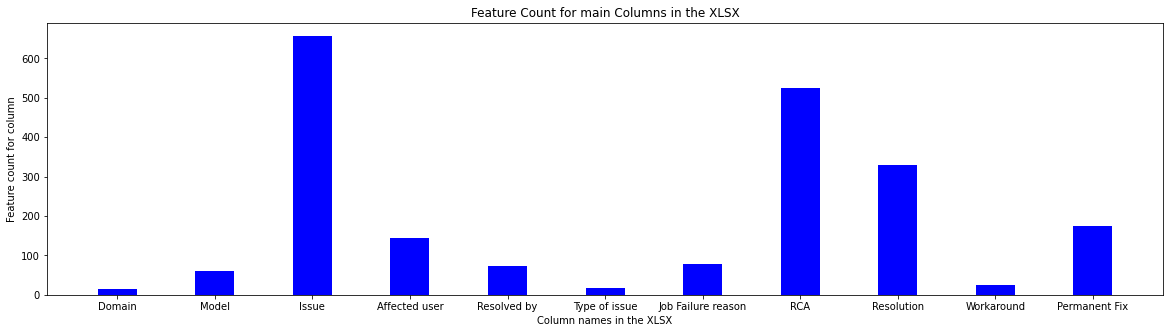

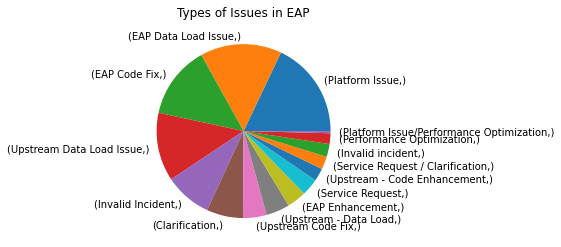

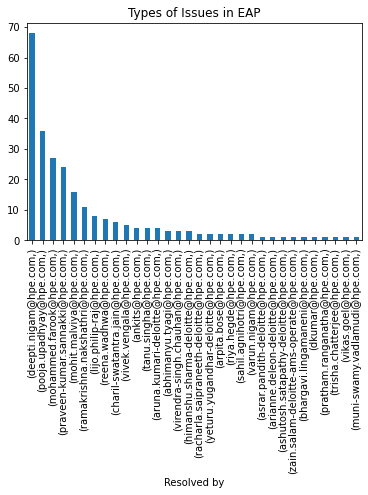

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
#'Opened Date'
df = pd.read_excel("C://Users//bondalas//rca.xlsx", index_col=None,na_values=['nan'], 
                   usecols=['Domain','Model','Issue','Affected user',
                            'Resolved by','Type of issue','Job Failure reason','RCA',
                            'Resolution','Workaround','Permanent Fix'] )
df.dropna()
pd.set_option('max_rows', None,'max_columns', None)
#print (df)
df_short = df[8:]

vect = TfidfVectorizer(stop_words='english')
Features_Count = []
for column in df_short:   
    inter=df_short[column].values.astype(str)
    intlist = inter.tolist()
    intstr = ' '.join(intlist)
    intfinlst = [intstr]
    bow = vect.fit(intfinlst)
    bow = vect.transform(intfinlst)
    Features = vect.get_feature_names()
    table = df_short[[column]]
    count_features = table.value_counts()    
    print("Features in ",column,"Column are:","\n")
    
    for i in range(len(Features)):
        print (i, ":",Features[i],",")
    print(count_features)
    print (bow)
    Features_Count.append(len(Features))
    print("\n\n\n")

columnslist = ['Domain','Model','Issue','Affected user',
                            'Resolved by','Type of issue','Job Failure reason','RCA',
                            'Resolution','Workaround','Permanent Fix']

fig = plt.figure(figsize = (20, 5))
plt.bar(columnslist, Features_Count, color ='blue',
        width = 0.4)
plt.xlabel("Column names in the XLSX")
plt.ylabel("Feature count for column")
plt.title("Feature Count for main Columns in the XLSX")
plt.show()

JFR=df_short[['Type of issue']]
countar=JFR.value_counts()
#print (countar)
countar.plot.pie(label="", title="Types of Issues in EAP")
plt.show()

JFR=df_short[['Resolved by']]
countar=JFR.value_counts()
#print (countar)
countar.plot.bar(label="", title="Types of Issues in EAP")
plt.show()